<a href="https://colab.research.google.com/github/pjcroxas/Transportation-Data-Science/blob/main/DRIVERs_Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install basemap
# !pip install basemap-data-hires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import cufflinks as cf
from datetime import datetime as dt
from plotly.offline import init_notebook_mode
import datetime
import warnings, os, re
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
cf.go_online()
pio.renderers.default = 'colab'

In [4]:
dirs = "/content/drive/My Drive/Data Science Portfolio/Transportation Analytics"
crash_df = pd.read_excel(dirs+"/DRIVERs_2017_2021_v2.xlsx")
crash_df.sample(3)

,record_id,timezone,created,modified,occurred_from,occurred_to,lat,lon,location_text,city,...,Loading,Maneuver,driverVehicle_id,Plate number,Vehicle type,Engine number,Chassis number,Classification,Insurance details,Year
30294,c29d440d-7a77-4563-9f7c-e33599777716,UTC,2018-05-25 03:23:15,2018-05-25 03:23:15,2018-05-25 02:37:57,2018-05-25 02:37:57,14.649642,121.074497,"Steveston Pizza, C. P. Garcia Avenue, Pansol, ...",NaN,...,NaN,NaN,fc186869-b5f7-4840-8ed1-58ea0913d538,ACK 3765,Truck (Rigid),NaN,NaN,NaN,NaN,2018
41828,ef7e67c0-a7a2-437d-a407-1d67dba22ccd,UTC,2019-07-01 06:45:35,2019-07-01 06:45:35,2019-07-01 02:00:26,2019-07-01 02:00:26,14.596355,121.059482,"Ortigas Flyover, Wack-Wack Greenhills, Mandalu...",NaN,...,NaN,NaN,a2696356-69af-4b1e-a28d-6aa7a0283243,ABF 9225,SUV,NaN,NaN,NaN,NaN,2019
2876,e6028752-a64a-43e9-ac0d-3346fede2705,UTC,2017-08-24 12:32:03,2017-08-24 12:32:03,2017-08-24 11:05:25,2017-08-24 11:05:25,14.648240,121.074400,"Valet Parking, Katipunan Avenue, UP Campus, Di...",NaN,...,NaN,NaN,f1037f8b-206c-4c7e-ad0d-7d8663e80ead,AOL-606,Van,NaN,NaN,Private,NaN,2017


In [5]:
# Dataframe Shape
crash_df.shape

(60644, 55)

# **Feature Engineering**

In [6]:
# Extract Date Features
crash_df["occurred_day"] = crash_df["occurred_from"].dt.day
crash_df["occurred_dayofweek"] = crash_df["occurred_from"].dt.day_name()
crash_df["occurred_weekday"] = crash_df["occurred_from"].dt.weekday
crash_df["occurred_hour"] = crash_df["occurred_from"].dt.hour
crash_df["occurred_month"] = crash_df["occurred_from"].dt.month
crash_df["occurred_year"] = crash_df["occurred_from"].dt.year

crash_df.sample(3)

,record_id,timezone,created,modified,occurred_from,occurred_to,lat,lon,location_text,city,...,Chassis number,Classification,Insurance details,Year,occurred_day,occurred_dayofweek,occurred_weekday,occurred_hour,occurred_month,occurred_year
56091,21ca6f31-91ae-4963-86d4-0a51511b313d,UTC,2021-05-30 06:50:47,2021-05-30 06:50:47,2021-05-26 00:40:00,2021-05-26 00:40:00,14.565100,121.054160,"J. P. Rizal Extension, Cembo, Makati 2nd Distr...",Makati,...,KWY00E178419,Private,NaN,2021,26,Wednesday,2,0,5,2021
6577,17706db1-07ad-47ed-859c-68c27270a459,UTC,2017-06-30 06:14:19,2017-06-30 06:14:19,2017-06-08 02:40:00,2017-06-08 02:40:00,14.419022,121.005070,"Mahogany, Pilar Village Phase 4, Pilar, Las Pi...",Las Piñas,...,NaN,Private,NaN,2017,8,Thursday,3,2,6,2017
42801,12e27bd3-f78e-467f-a7fc-e973e9e2c55b,UTC,2019-06-10 13:04:31,2019-06-10 13:04:31,2019-06-10 09:07:37,2019-06-10 09:07:37,14.668709,121.033545,"Metro North Medical Center, Mindanao Avenue, M...",NaN,...,NaN,Private,NaN,2019,10,Monday,0,9,6,2019


In [7]:
import pandas as pd
import re
import numpy as np

def extract_city_or_province(input_string):
    if pd.isna(input_string):
        return None
    # Regular expression pattern to match a city or province name followed by a 4-digit code
    pattern = r',\s*([\w\s]+),\s\d{4}'

    # Search for the pattern in the input string
    match = re.search(pattern, input_string)

    # If a match is found, return the city or province name
    if match:
        return match.group(1).strip()
    else:
        return None

# Example pandas DataFrame
data = {'column_string': ['Petron, East Service Road, Bunye Compound, Alabang, Muntinlupa, Metro Manila, 1781, Philippines']}
df = pd.DataFrame(data)

# Apply the function to extract city or province names
df['city_or_province'] = df['column_string'].apply(extract_city_or_province)

# Display the DataFrame with extracted city or province names
print(df)

                                       column_string city_or_province
0  Petron, East Service Road, Bunye Compound, Ala...     Metro Manila


In [8]:
# Extract region
crash_df["region"] = crash_df['location_text'].apply(extract_city_or_province)
crash_df["region"].value_counts()

region
Metro Manila           51963
Central Visayas         1879
Calabarzon               383
Caraga                   154
Mimaropa                  20
Northern Mindanao         14
Western Visayas           12
Zamboanga Peninsula        7
Maharashtra                5
Makati                     4
Soccsksargen               2
India                      2
Central Luzon              1
California                 1
Name: count, dtype: int64

# **Data Quality Inspection**

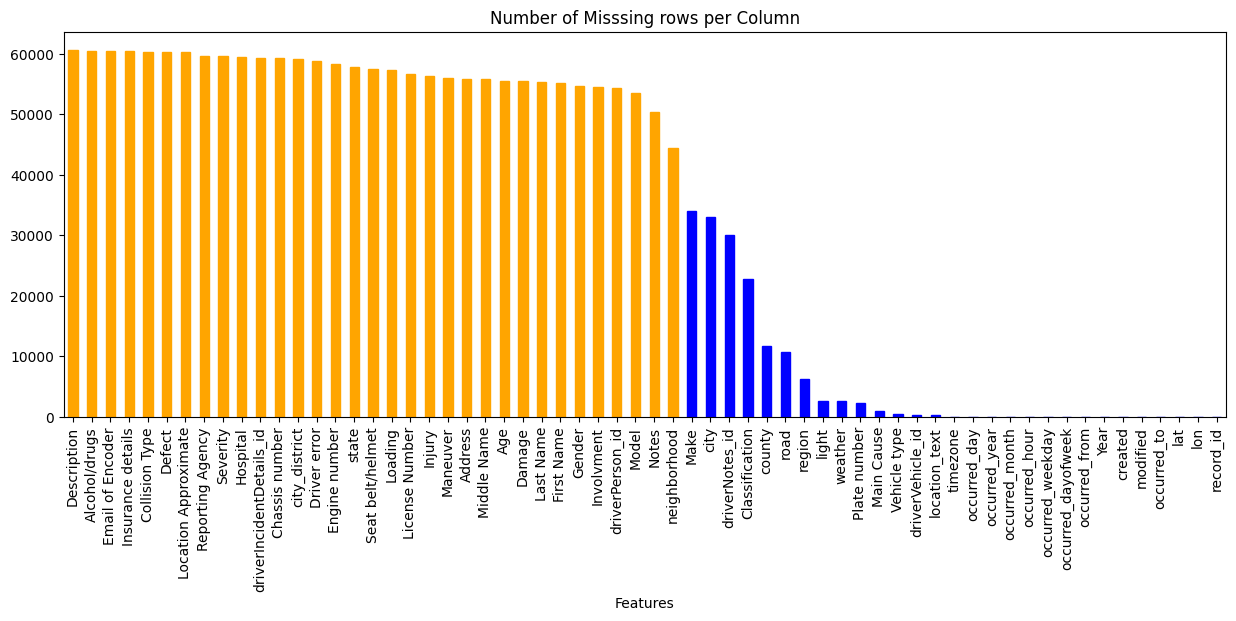

In [9]:
# Missing Data

cm = sns.light_palette("green", as_cmap=True)
crash_dq = crash_df.isnull().sum().reset_index()
crash_dq.rename(columns={"index": "Column names",
                               0: "Missing rows"}, inplace=True)
crash_dq.sort_values(by="Missing rows", ascending=False, inplace=True)
crash_dq.set_index("Column names", inplace=True)
ax = crash_dq.plot(kind="bar", figsize=(15, 5))

colors = ['blue' if val < 40000 else 'orange' for val in crash_dq['Missing rows']]

# Applying custom colors to the bars
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])
ax.set_axisbelow(True)
ax.get_legend().remove()
# ax.grid()
plt.title("Number of Misssing rows per Column")
plt.xlabel("Features")
style.use("default")

# **Analyzing the Situation**

Text(0, 0.5, ' ')

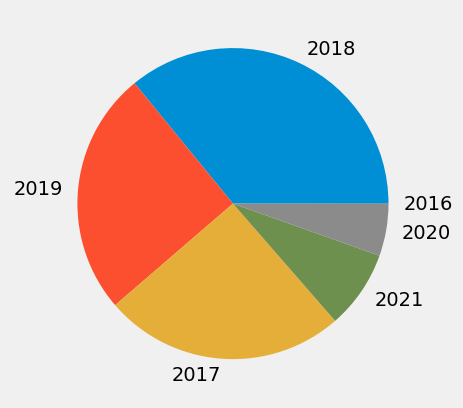

In [10]:
# crash_df["occurred_year"] = crash_df["occurred_year"].astype(int)
style.use("fivethirtyeight")
ax = crash_df["occurred_year"].value_counts().plot(kind="pie")
ax.set_facecolor("white")
plt.ylabel(" ")

The largest number of recorded accidents was on 2018, while the lowest were in 2016. Notice that there is no recorded accidents for 2021, that is because the reported accidents on this year happen on 2020.

In [16]:
# Person involved
crash_inv = crash_df.groupby(['record_id']).count()['timezone'].reset_index()
crash_inv.rename(columns={'timezone':'no. of person involved'}, inplace=True)

In [17]:
def collision_or_crash(data):
  if data > 1:
    return 'Multi-vehicle crash'
  elif data == 1:
    return 'Single vehicle crash'
  else:
    pass

crash_inv["classification"] = crash_inv["no. of person involved"].apply(collision_or_crash)
crash_inv_grouped = crash_inv.groupby(["classification"]).count()["no. of person involved"].reset_index()
crash_inv_grouped["percentage"] = ((crash_inv_grouped["no. of person involved"] / crash_df["record_id"].notnull().sum()) * 100)
crash_inv_grouped

,classification,no. of person involved,percentage
0,Multi-vehicle crash,27111,44.705165
1,Single vehicle crash,2014,3.321021


Text(0, 0.5, 'People involved (%)')

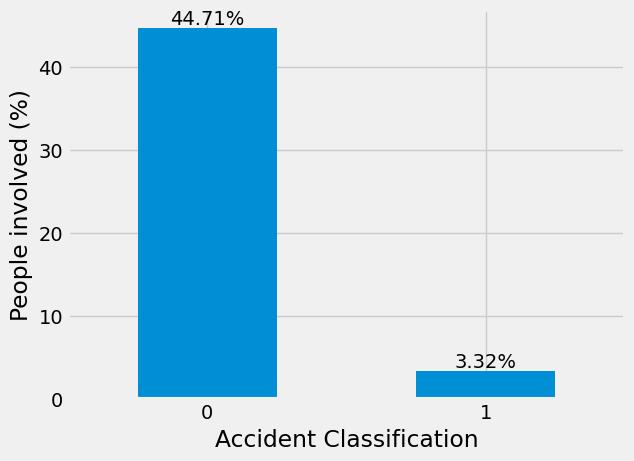

In [18]:
# crash_inv_grouped.set_index("classification", inplace=True)
ax = crash_inv_grouped.plot(kind="bar", y="percentage")
ax.legend().remove()
ax.bar_label(ax.containers[0], fmt='%.2f%%')
plt.xticks(rotation=0)
plt.xlabel("Accident Classification")
plt.ylabel("People involved (%)")

Event Involvement

On average, there are more people involved colliding with other people or vehicle than people crashing by itself.

Accident Location

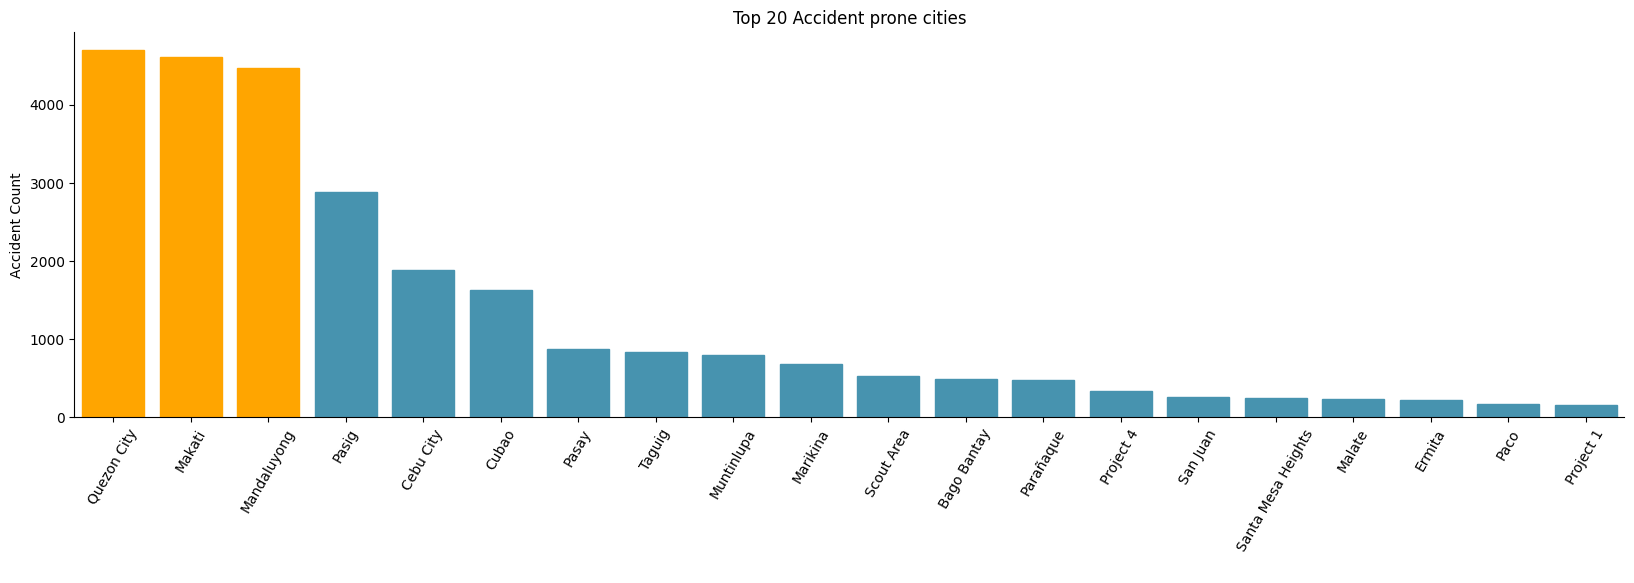

In [97]:
crash_city = crash_df.groupby(["city"]).count()["timezone"].reset_index()
crash_city.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_city.rename(columns={'timezone':'accident count'}, inplace=True)

plt.figure(figsize=[20, 5])
crash_city_20 = crash_city[:20]
ax = sns.barplot(x=crash_city_20["city"], y=crash_city_20["accident count"])
plt.ylabel("Accident Count", fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=60)
plt.title("Top 20 Accident prone cities")
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
style.use("default")

colors = ['#4793AF' if val < 4000 else 'orange' for val in crash_city_20['accident count']]

# Applying custom colors to the bars
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

In [20]:
crash_road = crash_df.groupby(["road","lat", "lon", "region"]).count()["timezone"].reset_index()
crash_road.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_road.rename(columns={'timezone':'accident count'}, inplace=True)
crash_road.sample(5)

,road,lat,lon,region,accident count
2312,Carlos P. Garcia Avenue,14.549669,121.057545,Metro Manila,2
12178,Kalayaan Flyover,14.557515,121.038040,Metro Manila,2
1273,Boni Avenue,14.572411,121.047192,Metro Manila,2
19973,Timog Avenue,14.632742,121.044724,Metro Manila,2
18132,Roosevelt Avenue,14.648697,121.017666,Metro Manila,2


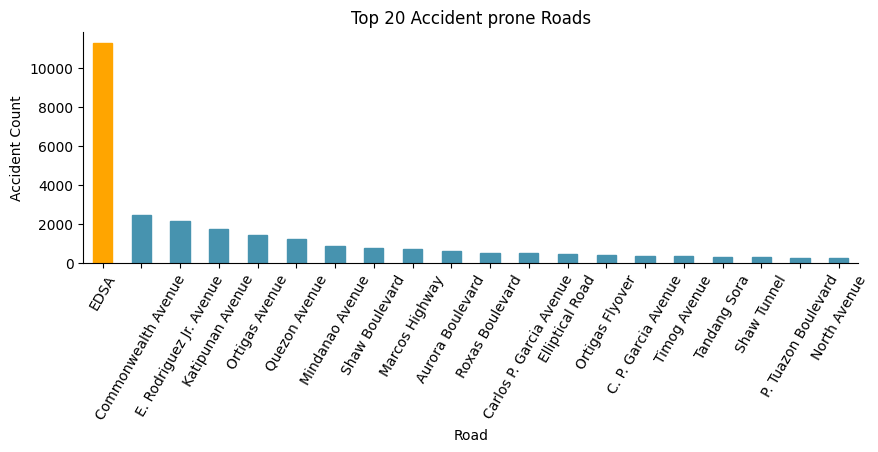

In [98]:
crash_road_manila = crash_road[crash_road["region"]=="Metro Manila"]
by_road = crash_road_manila.groupby(["road"]).sum()["accident count"].reset_index()
by_road.sort_values(by="accident count", ascending=False, inplace=True)
by_road.set_index("road", inplace=True)
# plt.figure()
ax = by_road[:20].plot(kind="bar", figsize=(10, 3))
plt.ylabel("Accident Count")
plt.title("Top 20 Accident prone Roads")
plt.xlabel("Road")
plt.xticks(rotation=60)
style.use("bmh")
ax.legend().remove()
ax.spines[['right', 'top']].set_visible(False)
style.use("default")

colors = ['#4793AF' if val < 4000 else 'orange' for val in by_road['accident count']]

# Applying custom colors to the bars
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

In [92]:
by_road[:10]

,accident count
road,
EDSA,11313
Commonwealth Avenue,2462
E. Rodriguez Jr. Avenue,2171
Katipunan Avenue,1727
Ortigas Avenue,1415
Quezon Avenue,1239
Mindanao Avenue,861
Shaw Boulevard,784
Marcos Highway,726


In [23]:
crash_road.to_csv(dirs+'/crash_per_region.xlsx', index=False)

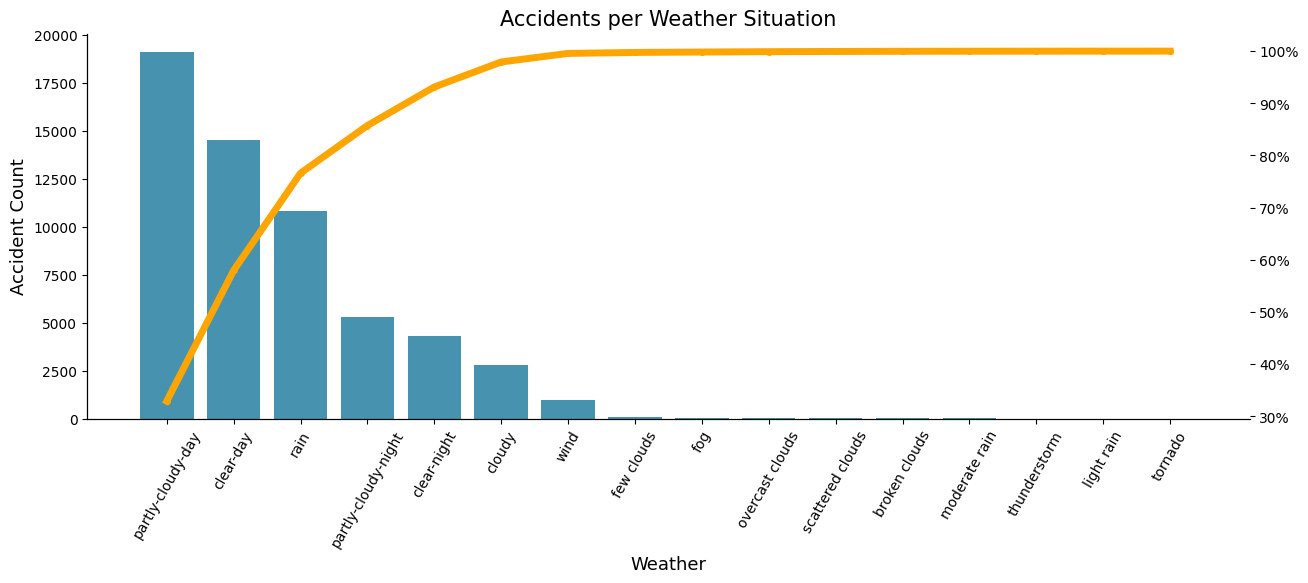

In [99]:
# Accidents caused by weather
crash_weather = crash_df.groupby(['weather']).count()["timezone"].reset_index()
crash_weather.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_weather.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_weather["cum_percentage"] = crash_weather["Accident Count"].cumsum()/crash_weather["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_weather.weather, crash_weather["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Weather", fontsize=13)
plt.title("Accidents per Weather Situation", fontsize=15)
plt.xticks(rotation=60)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_weather.weather, crash_weather['cum_percentage'], color= "orange", marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
style.use("default")

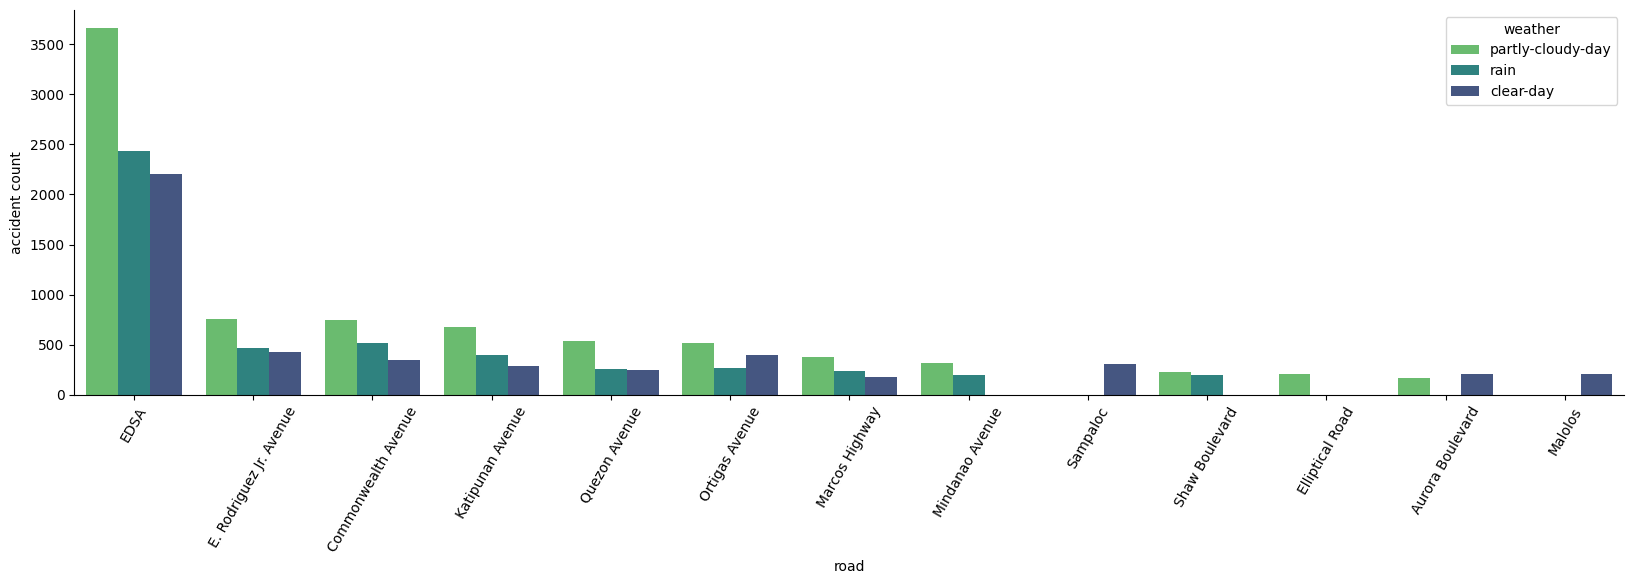

In [109]:
crash_weather_road = crash_df.groupby(["weather", "road"]).count()["timezone"].reset_index()
crash_weather_road.rename(columns={'timezone': 'accident count'}, inplace=True)
crash_weather_road.sort_values(by="accident count", inplace=True, ascending=False)
crash_weather_road = crash_weather_road[(crash_weather_road["weather"]=='partly-cloudy-day') |
                                        (crash_weather_road["weather"]=='rain') |
                                        (crash_weather_road["weather"]=='clear-day')]


style.use("default")
plt.figure(figsize=(20, 5))
ax = sns.barplot(crash_weather_road[:30],
                 x="road",
                 y="accident count",
                 hue="weather",
                 palette="viridis_r")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)

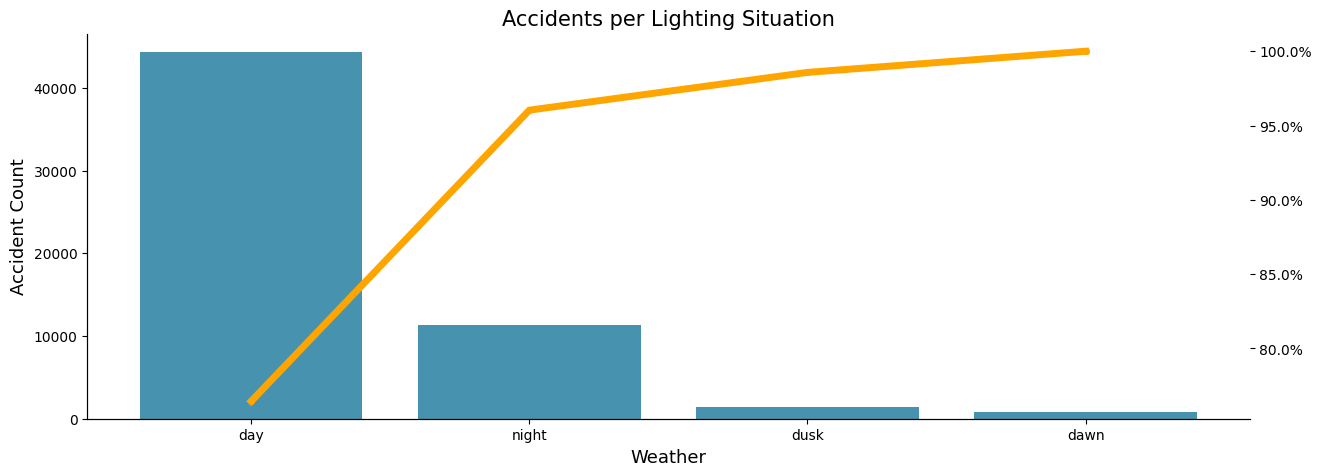

In [102]:
# Accidents caused by lighting
crash_light = crash_df.groupby(['light']).count()["timezone"].reset_index()
crash_light.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_light.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_light["cum_percentage"] = crash_light["Accident Count"].cumsum()/crash_light["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_light.light, crash_light["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Weather", fontsize=13)
plt.title("Accidents per Lighting Situation", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_light.light, crash_light['cum_percentage'], color= "orange", marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

Text(0.5, 1.0, 'Misclassification of lighting condition')

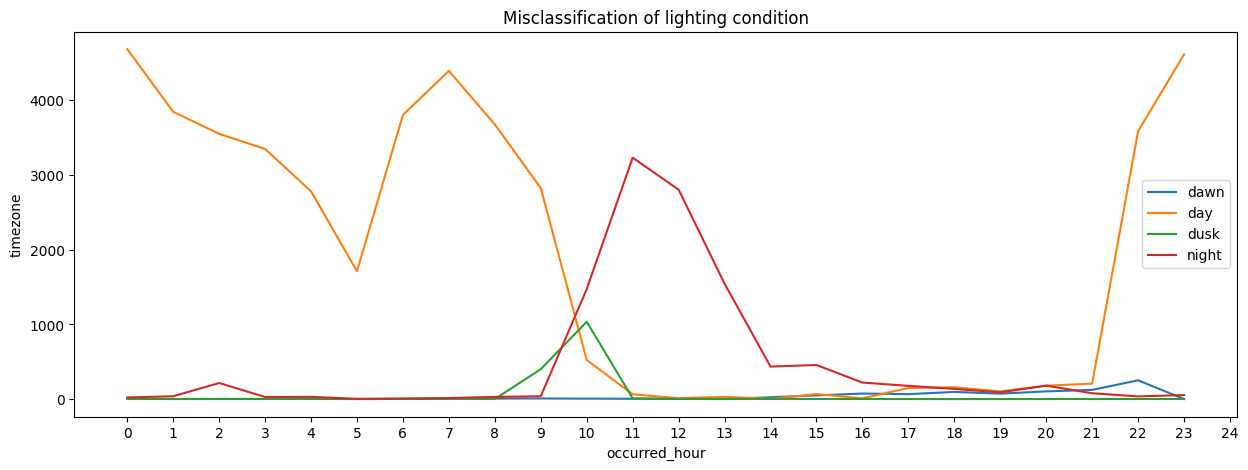

In [136]:
crash_light_hour = crash_df.groupby(["light", "occurred_hour"]).count()["timezone"].reset_index()
crash_light_hour

plt.figure(figsize=(15, 5))
ax = sns.lineplot(crash_light_hour,
                  x="occurred_hour",
                  y="timezone",
                  hue="light")
plt.legend(loc="best")
plt.xticks(range(0, 25))
style.use('default')
plt.title("Misclassification of lighting condition")

In [144]:
def lighting_condition(hour):
  # Check for day, night, dawn, dusk
    if 7 <= hour < 17:
        return 'Day'
    elif 17 <= hour < 22:
        return 'Dusk'
    elif 22 <= hour <= 24 or 0 <= hour < 5:
        return 'Night'
    elif 5 <= hour < 7:
        return 'Dawn'
    elif hour == 24:
        return 'Night'
    else:
        return 'Unknown'

crash_df["lighting_condition"] = crash_df["occurred_hour"].apply(lighting_condition)

In [264]:
# crash_df["occurred_hour"].value_counts()

In [145]:
crash_df["lighting_condition"].value_counts()

lighting_condition
Night    27466
Day      25290
Dawn      5862
Dusk      2026
Name: count, dtype: int64

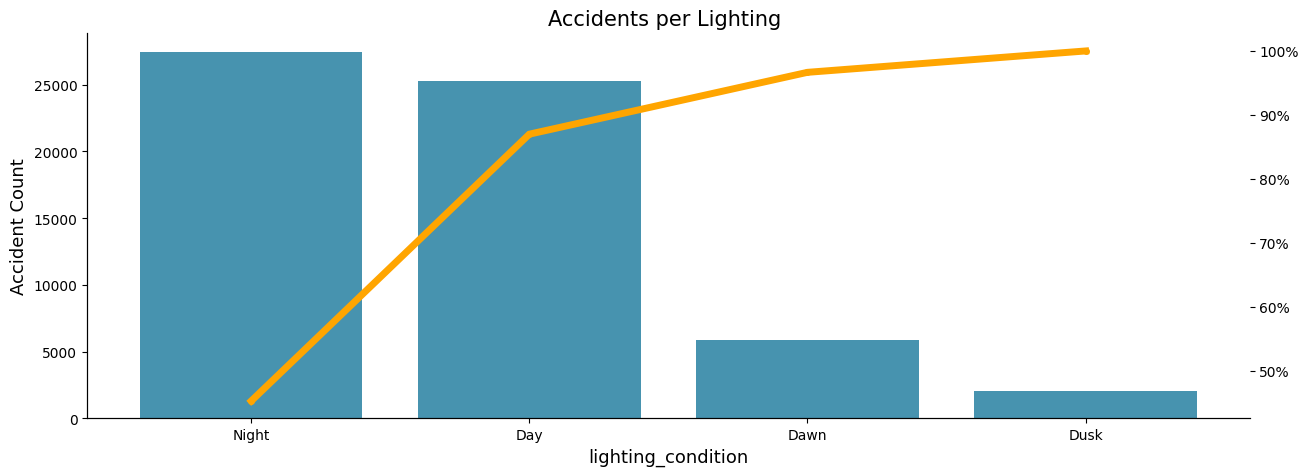

In [146]:
# Accidents caused by lighting
crash_light = crash_df.groupby(['lighting_condition']).count()["timezone"].reset_index()
crash_light.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_light.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_light["cum_percentage"] = crash_light["Accident Count"].cumsum()/crash_light["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_light.lighting_condition, crash_light["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("lighting_condition", fontsize=13)
plt.title("Accidents per Lighting ", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_light.lighting_condition, crash_light['cum_percentage'], color= "orange", marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

In [115]:
crash_light_hour

,light,occurred_hour,timezone
0,dawn,0,5
1,dawn,1,2
2,dawn,4,2
3,dawn,7,4
4,dawn,8,8
...,...,...,...
71,night,19,91
72,night,20,181
73,night,21,79
74,night,22,37


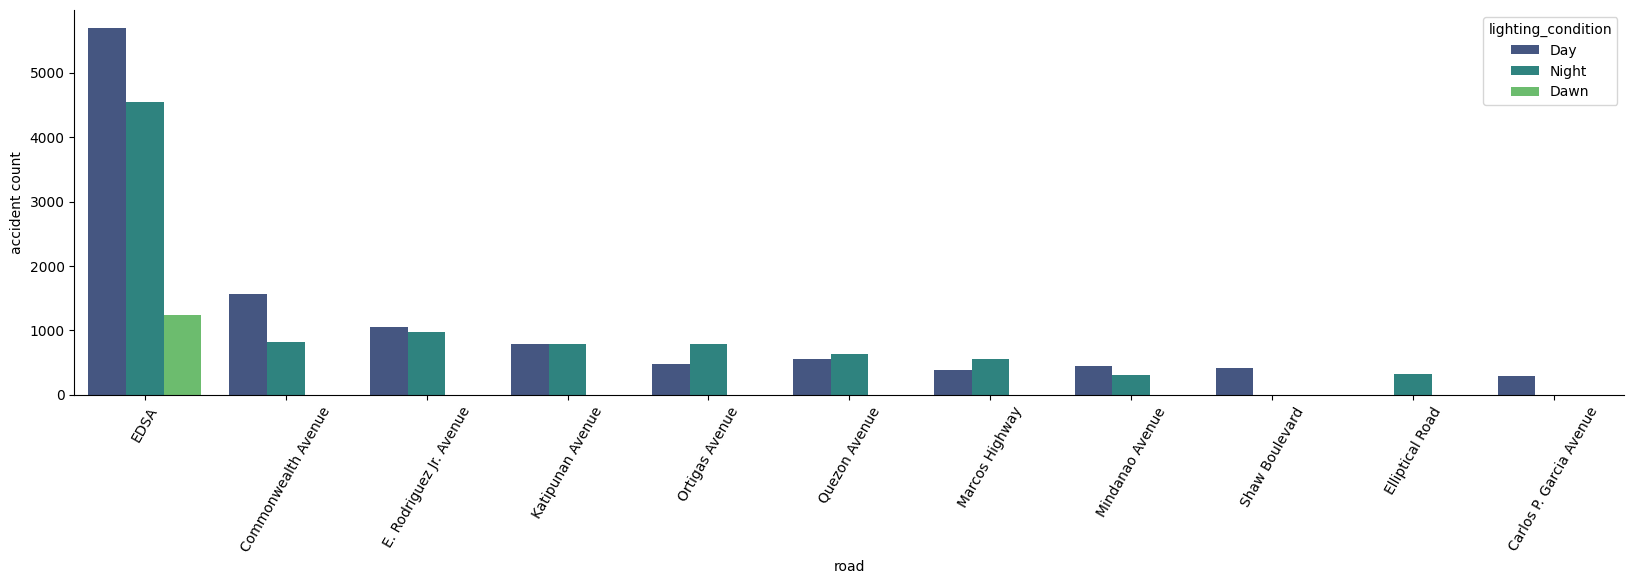

In [151]:
crash_light_road = crash_df.groupby(["lighting_condition", "road"]).count()["timezone"].reset_index()
crash_light_road.rename(columns={'timezone': 'accident count'}, inplace=True)
crash_light_road.sort_values(by="accident count", inplace=True, ascending=False)

style.use("default")
plt.figure(figsize=(20, 5))
ax = sns.barplot(crash_light_road[:20],
                 x="road",
                 y="accident count",
                 hue="lighting_condition",
                 palette="viridis")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)

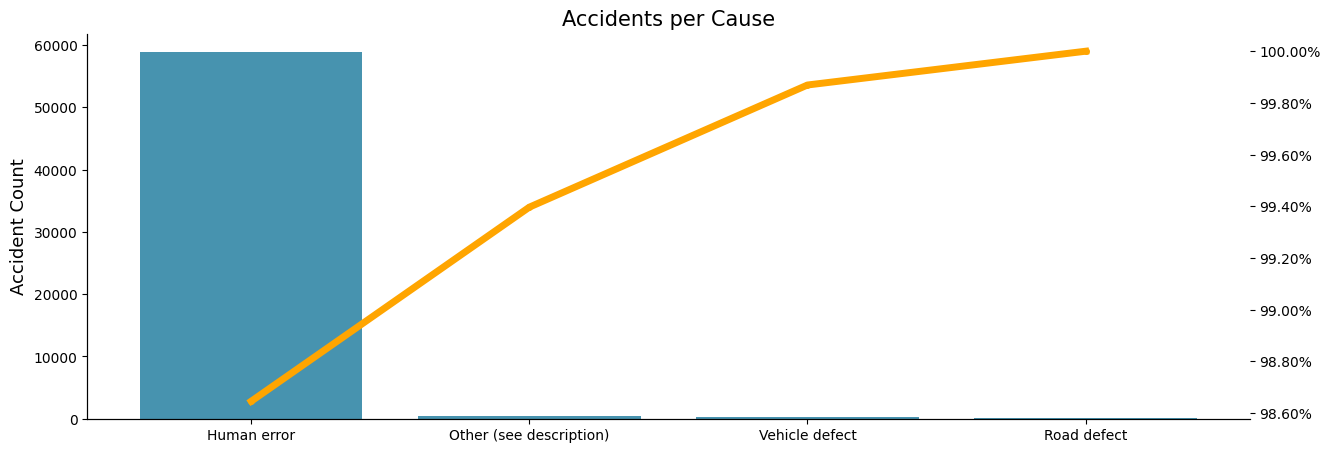

In [122]:
# Accidents causes
crash_cause = crash_df.groupby(['Main Cause']).count()["timezone"].reset_index()
crash_cause.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_cause.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_cause["cum_percentage"] = crash_cause["Accident Count"].cumsum()/crash_cause["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_cause["Main Cause"], crash_cause["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel(" ", fontsize=13)
plt.title("Accidents per Cause", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_cause["Main Cause"], crash_cause['cum_percentage'], color= "orange", marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

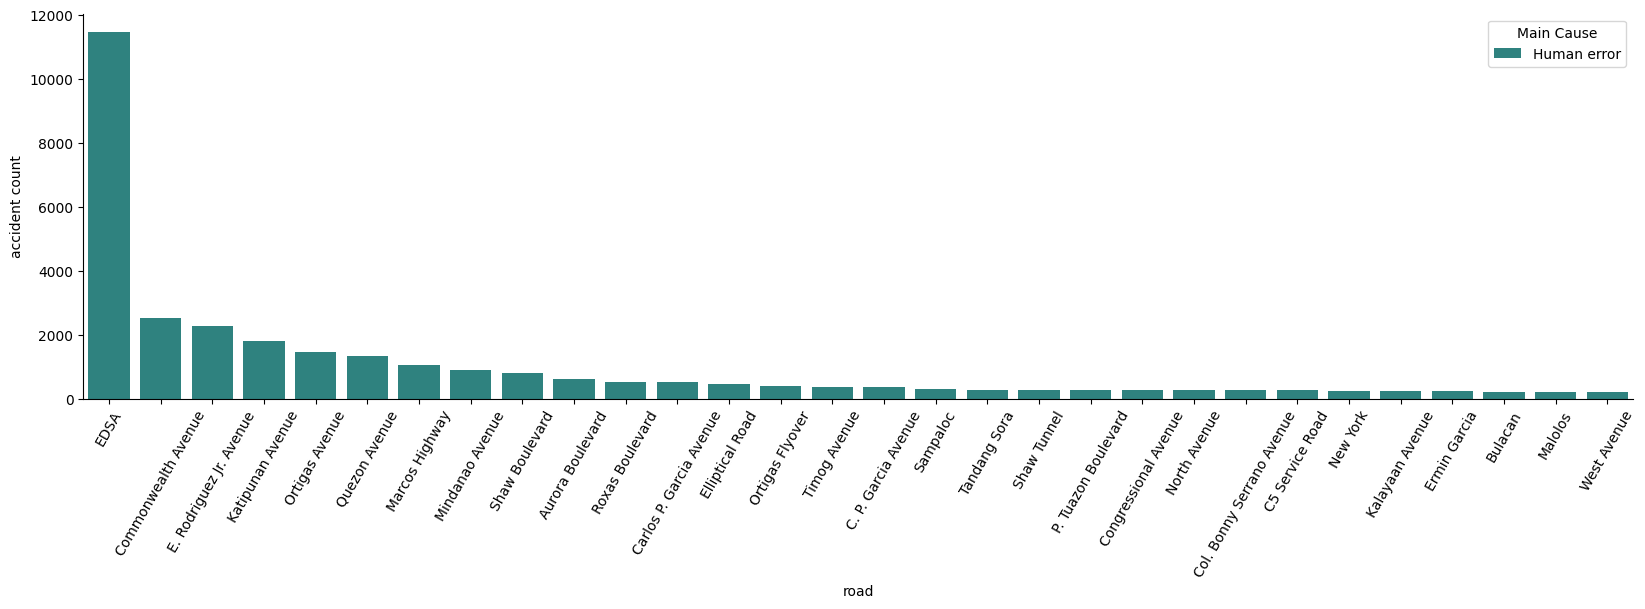

In [132]:
crash_cause_road = crash_df.groupby(["Main Cause", "road"]).count()["timezone"].reset_index()
crash_cause_road.rename(columns={'timezone': 'accident count'}, inplace=True)
crash_cause_road.sort_values(by="accident count", inplace=True, ascending=False)

style.use("default")
plt.figure(figsize=(20, 5))
ax = sns.barplot(crash_cause_road[:30],
                 x="road",
                 y="accident count",
                 hue="Main Cause",
                 palette="viridis_r")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)

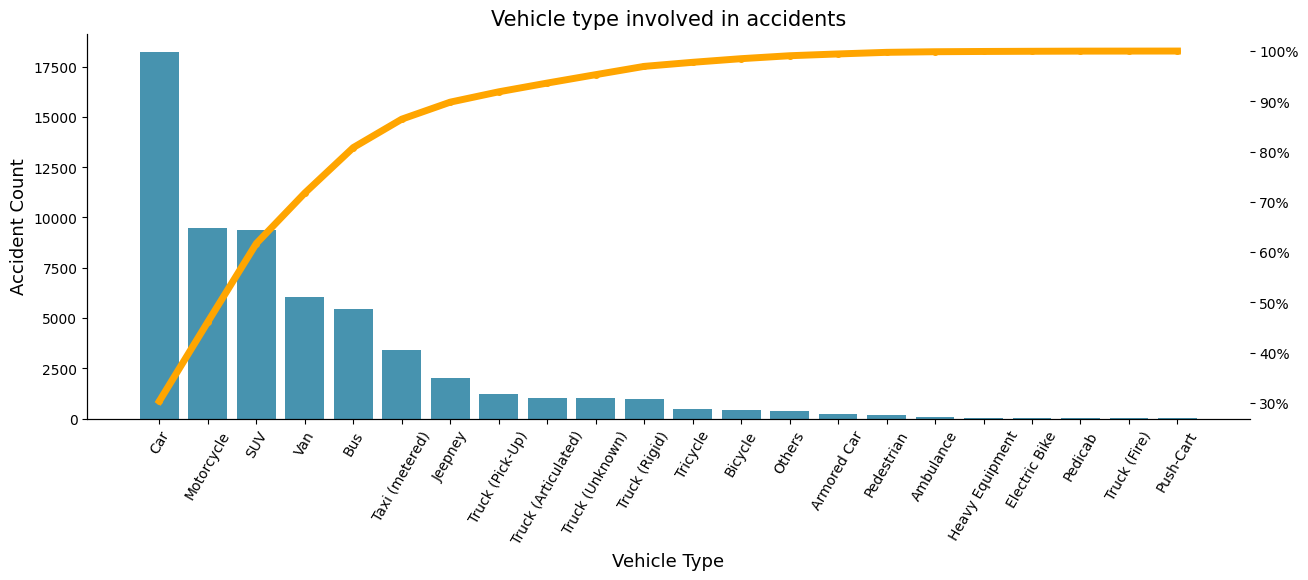

In [129]:
# Vehicle Type
crash_car_type = crash_df.groupby(['Vehicle type']).count()["timezone"].reset_index()
crash_car_type.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_car_type.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_car_type["cum_percentage"] = crash_car_type["Accident Count"].cumsum()/crash_car_type["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_car_type["Vehicle type"], crash_car_type["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Vehicle Type", fontsize=13)
plt.title("Vehicle type involved in accidents", fontsize=15)
plt.xticks(rotation=60)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_car_type["Vehicle type"],
         crash_car_type['cum_percentage'],
         color= "orange",
         marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)

# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

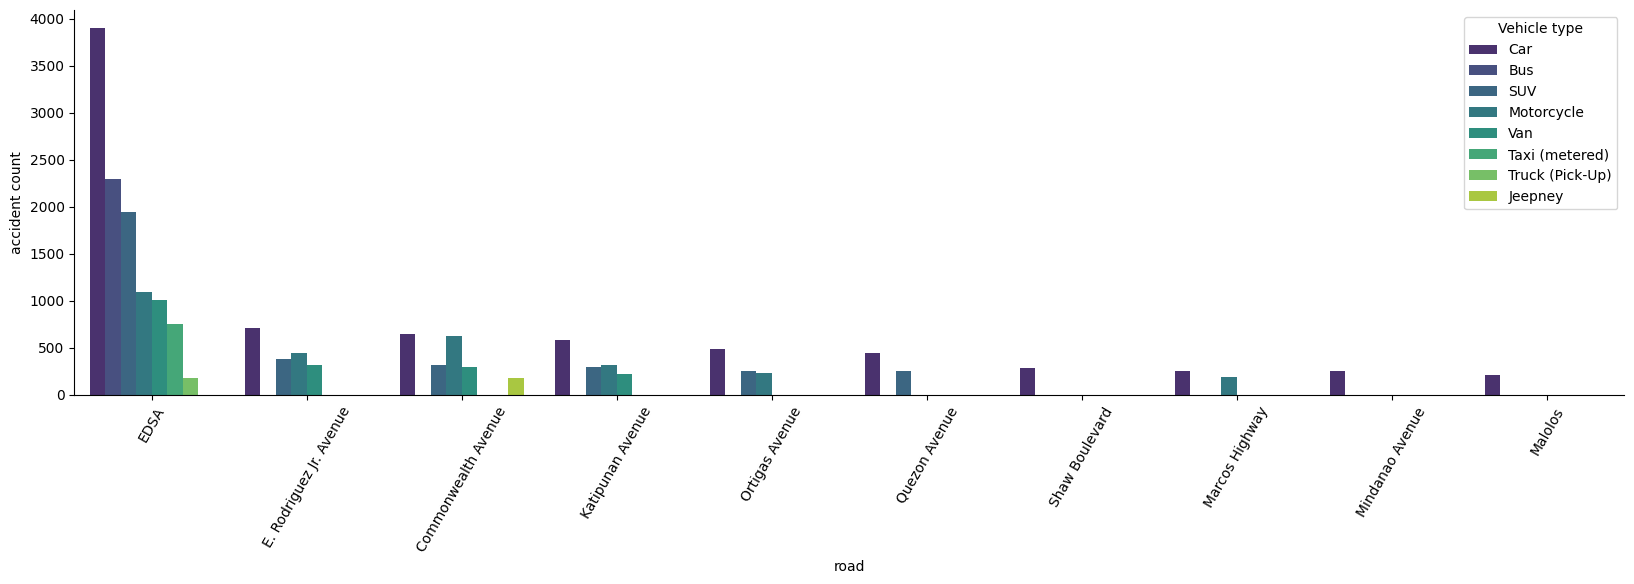

In [154]:
crash_vehicle_road = crash_df.groupby(["Vehicle type", "road"]).count()["timezone"].reset_index()
crash_vehicle_road.rename(columns={'timezone': 'accident count'}, inplace=True)
crash_vehicle_road.sort_values(by="accident count", inplace=True, ascending=False)

style.use("default")
plt.figure(figsize=(20, 5))
ax = sns.barplot(crash_vehicle_road[:30],
                 x="road",
                 y="accident count",
                 hue="Vehicle type",
                 palette="viridis")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)

In [175]:
crash_make = crash_df.groupby(["Make"]).count()["timezone"].reset_index()
crash_make.sort_values("timezone", ascending=False, inplace=True)
crash_make_greater100 = crash_make[crash_make["timezone"]>=100]
crash_make_greater100["Make"] = crash_make_greater100["Make"].str.lower()


def replace_toyota_vios(text):
    # Define the pattern to match "toyota vios"
    pattern = r'\btoyota\s+vios\b'
    pattern2 = r'\bvios+\s\b'

    # Replace "toyota vios" with "vios"
    replaced_text = re.sub(pattern, 'vios', text, flags=re.IGNORECASE)
    replaced_space = re.sub(pattern2, 'vios', text, flags=re.IGNORECASE)

    return replaced_text

def replace_toyota_innova(text):
    # Define the pattern to match "toyota vios"
    pattern = r'\btoyota\s+innova\b'

    # Replace "toyota vios" with "vios"
    replaced_text = re.sub(pattern, 'vios', text, flags=re.IGNORECASE)

    return replaced_text

In [176]:
# Apply the replacement function to the 'cars' column
crash_make_greater100["Make"] = crash_make_greater100["Make"].apply(lambda x: replace_toyota_vios(x))
crash_make_greater100["Make"] = crash_make_greater100["Make"].apply(lambda x: replace_toyota_innova(x))

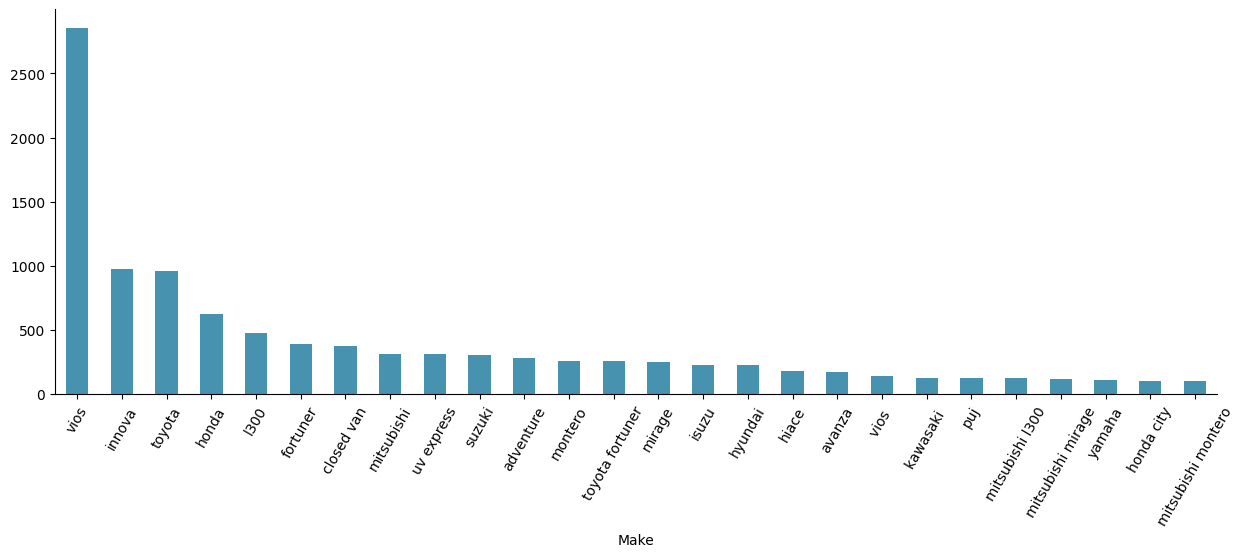

In [182]:
# process
crash_make_greater100_2 = crash_make_greater100.groupby("Make").sum()["timezone"].reset_index()
crash_make_greater100_2[crash_make_greater100_2["Make"]=='vios ']
crash_make_greater100_2.sort_values("timezone", ascending=False, inplace=True)
crash_make_greater100_2.set_index("Make", inplace=True)
ax = crash_make_greater100_2.plot(kind="bar", figsize=(15, 5), color="#4793AF")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().remove()

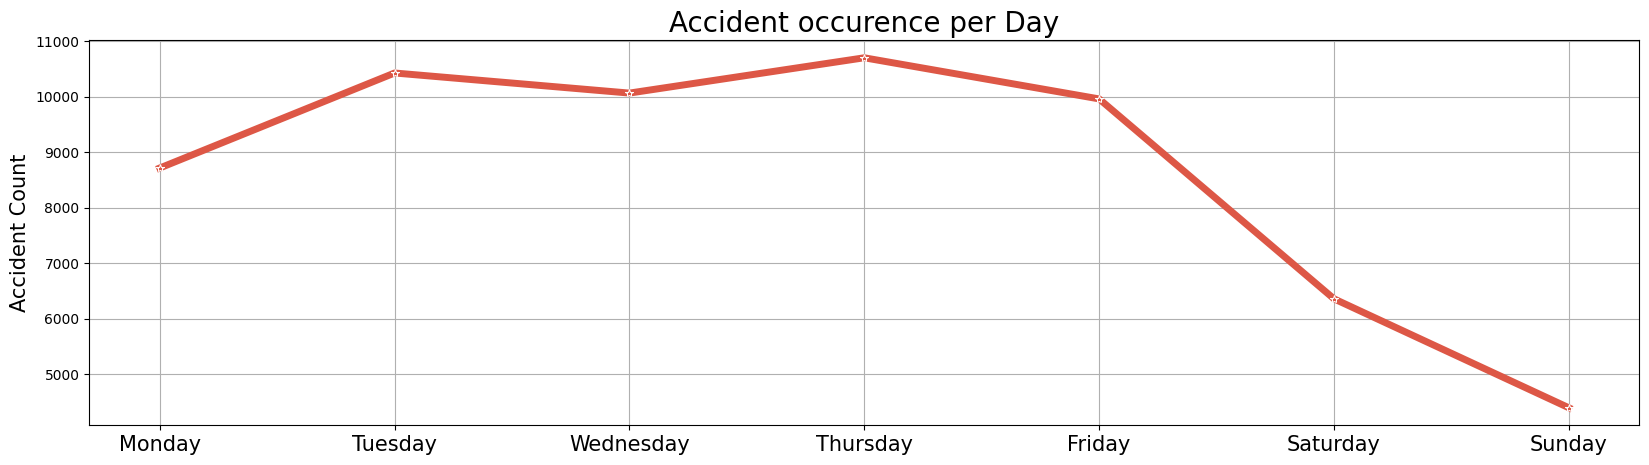

In [185]:
crash_day = crash_df.groupby(["occurred_dayofweek", "occurred_weekday",]).count()["timezone"].reset_index()
crash_day = crash_df.groupby(["occurred_dayofweek", "occurred_weekday"]).count()["timezone"].reset_index()
# crash_day.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_day.rename(columns={'timezone':'accident count'}, inplace=True)
crash_day.sort_values(by=["occurred_weekday"], inplace=True)
plt.figure(figsize=[20, 5])

ax = sns.lineplot(data=crash_day,
            x="occurred_dayofweek",
            y="accident count",
            marker="*",
            linewidth=5,
            color="#DD5746")

plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("")
plt.title("Accident occurence per Day", fontsize=20)
plt.xticks(fontsize=15)
plt.grid()

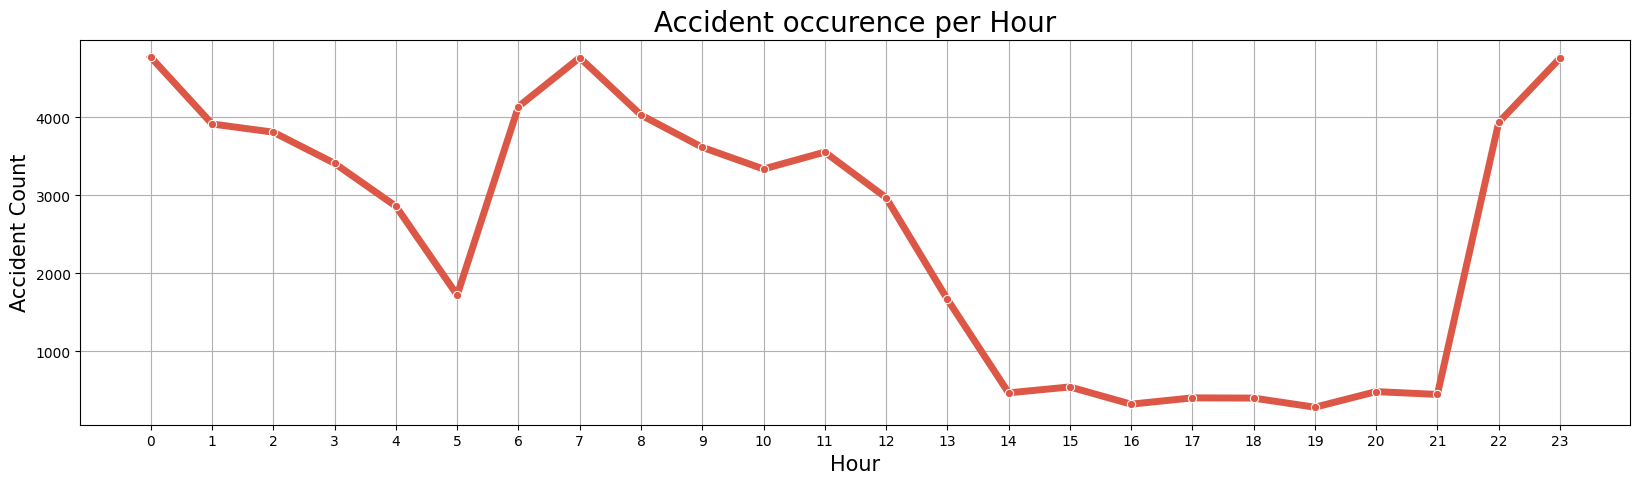

In [184]:
crash_hour = crash_df.groupby(["occurred_hour"]).count()["timezone"].reset_index()
crash_hour.rename(columns={'timezone':'accident count'}, inplace=True)
plt.figure(figsize=[20, 5])

sns.lineplot(data=crash_hour,
            x="occurred_hour",
            y="accident count",
             marker="o",
             color="#DD5746",
             linewidth=5)
plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("Hour", fontsize=15)
plt.title("Accident occurence per Hour", fontsize=20)
plt.xticks(range(0, 24))
plt.grid()

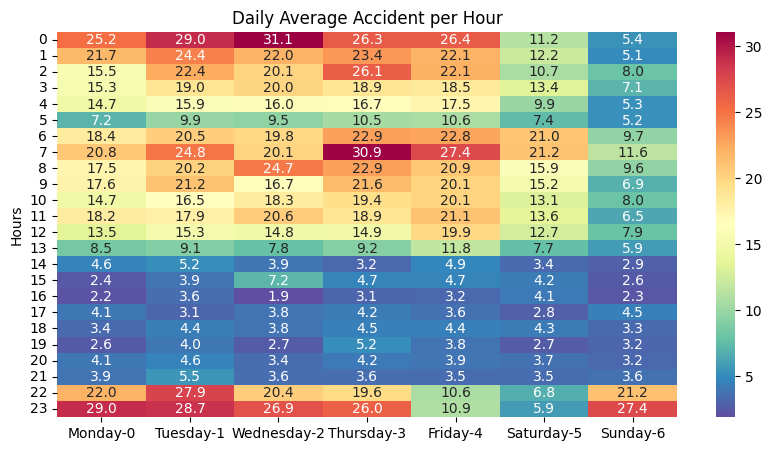

In [186]:
crash_hour_day = crash_df.groupby(["occurred_dayofweek", "occurred_hour", "occurred_day", "occurred_weekday"]).count()["timezone"].reset_index()
crash_hour_weekday = crash_hour_day.groupby(["occurred_dayofweek", "occurred_hour", "occurred_weekday"]).mean()["timezone"].reset_index()
crash_hour_weekday.rename(columns={"timezone":'accident count'}, inplace=True)
crash_hour_weekday.sort_values(by="occurred_weekday", ascending=True, inplace=True)
crash_hour_weekday["occurred_hour"] = crash_hour_weekday["occurred_hour"].astype(int)
crash_pivot = crash_hour_weekday.pivot(index="occurred_hour",
                                   columns=["occurred_dayofweek", "occurred_weekday"],
                                   values="accident count")

plt.figure(figsize=(10,5))
plt.title("Daily Average Accident per Hour")
sns.heatmap(data=crash_pivot,
            annot=True,
            fmt='.1f',
            cmap="Spectral_r")
plt.yticks(rotation=360)
plt.xlabel(" ")
plt.ylabel("Hours")
plt.show()
style.use("fivethirtyeight")

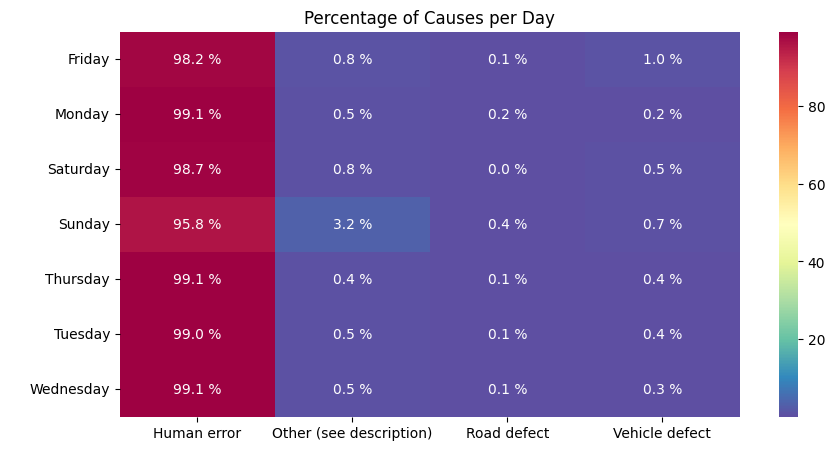

In [241]:
crash_hour_day = crash_df.groupby(["occurred_dayofweek", "Main Cause"]).agg({"timezone": "count"})
crash_hour_day_pct = crash_hour_day.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
crash_hour_day_pct = crash_hour_day_pct.rename_axis(["dayofweek", "day","cause"]).reset_index()
crash_hour_day_pct.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day_pct.pivot(index="cause",
                                   columns="dayofweek",
                                   values="accident count")
crash_pivot
plt.figure(figsize=(10,5))
plt.title("Percentage of Causes per Day")
ax = sns.heatmap(data=crash_pivot.T,
                annot=True,
                fmt='.1f',
                cmap="Spectral_r")
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel(" ")
plt.xlabel(" ", fontsize=13)
plt.show()
style.use("default")

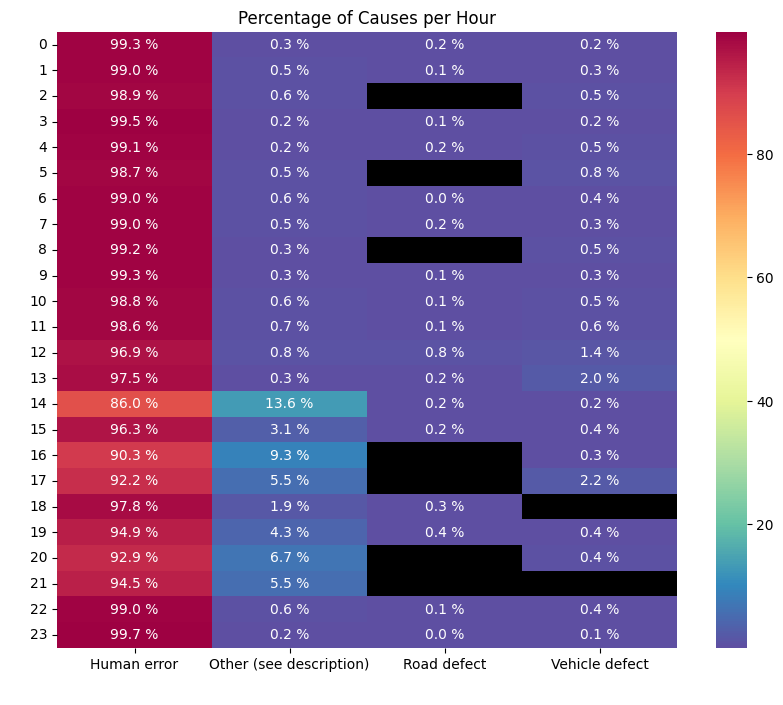

In [242]:
crash_hour_day = crash_df.groupby(["occurred_hour", "Main Cause"]).agg({"timezone": "count"})
crash_hour_day_pct = crash_hour_day.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
crash_hour_day_pct = crash_hour_day_pct.rename_axis(["dayofweek", "hour","cause"]).reset_index()
crash_hour_day_pct.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day_pct.pivot(index="cause",
                                   columns="hour",
                                   values="accident count")
plt.figure(figsize=(10,8))
plt.title("Percentage of Causes per Hour")
ax = sns.heatmap(data=crash_pivot.T,
                annot=True,
                fmt='.1f',
                cmap="Spectral_r")
ax.set_facecolor('xkcd:black')
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel(" ")
plt.yticks(rotation=0)
plt.xlabel(" ", fontsize=13)
plt.show()
style.use("default")

# **Demographics**

In [250]:
crash_df["Gender"].value_counts()

Gender
Male      4674
Female    1173
Other        5
Name: count, dtype: int64

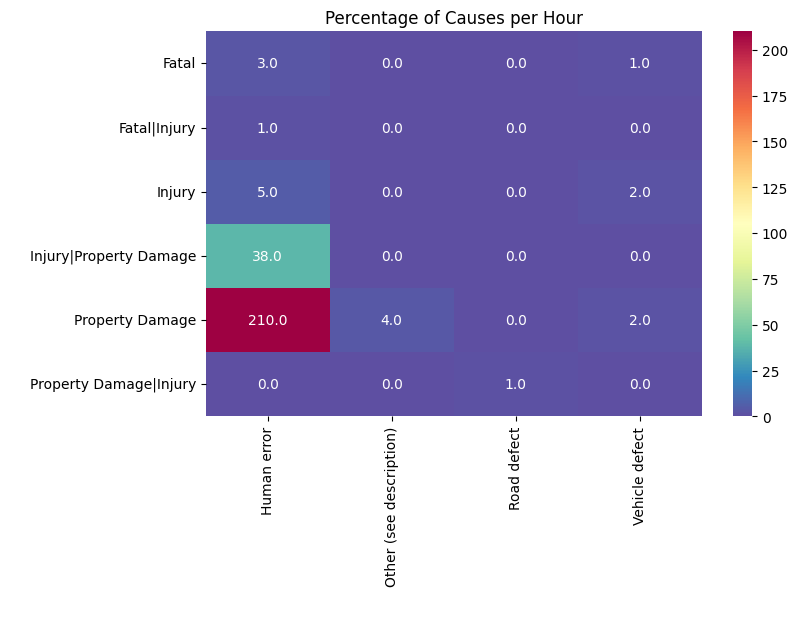

In [266]:
crash_cause_severity = crash_df.groupby(["Main Cause", "Severity"]).count()["timezone"].reset_index()
crash_cause_severity.rename(columns={"timezone": "accident count"}, inplace=True)
crash_cause_severity_pivot = crash_cause_severity.pivot(index="Main Cause",
                                                        columns="Severity",
                                                        values="accident count")
# crash_cause_severity_pivot
cmap = 'coolwarm'
crash_cause_severity_pivot =crash_cause_severity_pivot.fillna(0)
plt.figure(figsize=(8,5))
plt.title("Percentage of Causes per Hour")
ax = sns.heatmap(data=crash_cause_severity_pivot.T,
                annot=True,
                fmt='.1f',
                cmap="Spectral_r")
# ax.set_facecolor('xkcd:black')
# for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel(" ")
plt.yticks(rotation=0)
plt.xlabel(" ", fontsize=13)
plt.show()
style.use("default")

# **Human Error**

# **Text Analysis: Enforcer's Notes**

In [ ]:
from wordcloud import STOPWORDS
import re

In [ ]:
stopwords = set(STOPWORDS)

class text_cleaning():
    def __init__(self, text):
        self.text = text
        self.new_text = self.remove_special_chars()

    def remove_stopwords(self):
        no_stopwords = " ".join([word for word in str(self.text).split() if word not in stopwords])
        return no_stopwords

    def remove_special_chars(self):
        no_special_chars = re.sub(r"[^a-zA\s]","", self.remove_urls())
        no_hash = no_special_chars.replace("#", "").strip()
        self.new_text = no_hash
        return self.new_text